<a href="https://colab.research.google.com/github/yehezkielesmjtk/i-recycle_model/blob/main/Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yehezkielesmjtk","key":"93e34f31a9b98a750f160023f88e538f"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d mostafaabla/garbage-classification

 96% 230M/239M [00:01<00:00, 116MB/s]
100% 239M/239M [00:01<00:00, 126MB/s]


In [4]:
!unzip -q garbage-classification.zip -d .

### **Dataset Overview**

In [5]:
import os
import zipfile

battery_dir = os.path.join('garbage_classification/battery')
biological_dir = os.path.join('garbage_classification/biological')
brownglass_dir = os.path.join('garbage_classification/brown-glass')
cardboard_dir = os.path.join('garbage_classification/cardboard')
clothes_dir = os.path.join('garbage_classification/clothes')
greenglass_dir = os.path.join('garbage_classification/green-glass')
metal_dir = os.path.join('garbage_classification/metal')
paper_dir = os.path.join('garbage_classification/paper')
plastic_dir = os.path.join('garbage_classification/plastic')
shoes_dir = os.path.join('garbage_classification/shoes')
trash_dir = os.path.join('garbage_classification/trash')
whiteglass_dir = os.path.join('garbage_classification/white-glass')

In [6]:
print('total battery images:', len(os.listdir(battery_dir)))
print('total biological images:', len(os.listdir(biological_dir)))
print('total brown-glass images:', len(os.listdir(brownglass_dir)))
print('total cardboard images:', len(os.listdir(cardboard_dir)))
print('total clothes images:', len(os.listdir(clothes_dir)))
print('total green-glass images:', len(os.listdir(greenglass_dir)))
print('total metal images:', len(os.listdir(metal_dir)))
print('total paper images:', len(os.listdir(paper_dir)))
print('total plastic images:', len(os.listdir(plastic_dir)))
print('total shoes images:', len(os.listdir(shoes_dir)))
print('total trash images:', len(os.listdir(trash_dir)))
print('total white-glass images:', len(os.listdir(whiteglass_dir)))

total battery images: 945
total biological images: 985
total brown-glass images: 607
total cardboard images: 891
total clothes images: 5325
total green-glass images: 629
total metal images: 769
total paper images: 1050
total plastic images: 865
total shoes images: 1977
total trash images: 697
total white-glass images: 775


In [7]:
battery_files = os.listdir(battery_dir)
print(battery_files[:5])
biological_files = os.listdir(biological_dir)
print(biological_files[:5])
brownglass_files = os.listdir(brownglass_dir)
print(brownglass_files[:5])
cardboard_files = os.listdir(cardboard_dir)
print(cardboard_files[:5])
clothes_files = os.listdir(clothes_dir)
print(clothes_files[:5])
greenglass_files = os.listdir(greenglass_dir)
print(greenglass_files[:5])
metal_files = os.listdir(metal_dir)
print(metal_files[:5])
paper_files = os.listdir(paper_dir)
print(paper_files[:5])
plastic_files = os.listdir(plastic_dir)
print(plastic_files[:5])
shoes_files = os.listdir(shoes_dir)
print(shoes_files[:5])
trash_files = os.listdir(trash_dir)
print(trash_files[:5])
whiteglass_files = os.listdir(whiteglass_dir)
print(whiteglass_files[:5])

['battery265.jpg', 'battery658.jpg', 'battery100.jpg', 'battery547.jpg', 'battery896.jpg']
['biological608.jpg', 'biological497.jpg', 'biological365.jpg', 'biological862.jpg', 'biological241.jpg']
['brown-glass598.jpg', 'brown-glass252.jpg', 'brown-glass522.jpg', 'brown-glass493.jpg', 'brown-glass207.jpg']
['cardboard316.jpg', 'cardboard166.jpg', 'cardboard2.jpg', 'cardboard560.jpg', 'cardboard235.jpg']
['clothes3757.jpg', 'clothes839.jpg', 'clothes187.jpg', 'clothes4633.jpg', 'clothes5094.jpg']
['green-glass9.jpg', 'green-glass175.jpg', 'green-glass583.jpg', 'green-glass106.jpg', 'green-glass451.jpg']
['metal451.jpg', 'metal206.jpg', 'metal498.jpg', 'metal523.jpg', 'metal570.jpg']
['paper445.jpg', 'paper569.jpg', 'paper924.jpg', 'paper26.jpg', 'paper73.jpg']
['plastic515.jpg', 'plastic800.jpg', 'plastic85.jpg', 'plastic119.jpg', 'plastic56.jpg']
['shoes4.jpg', 'shoes1037.jpg', 'shoes935.jpg', 'shoes34.jpg', 'shoes1574.jpg']
['trash1.jpg', 'trash406.jpg', 'trash340.jpg', 'trash424.jpg'

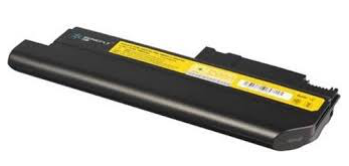

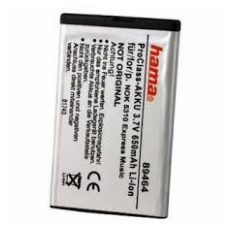

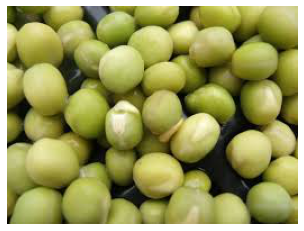

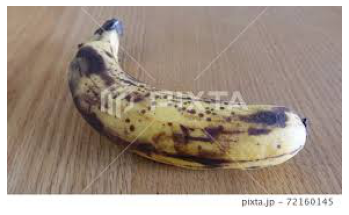

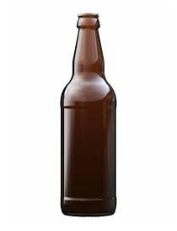

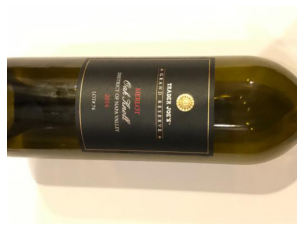

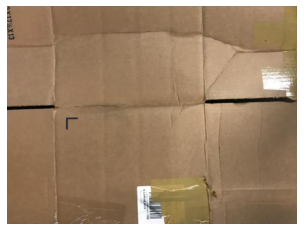

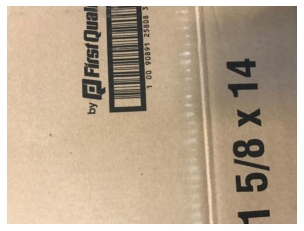

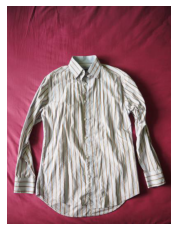

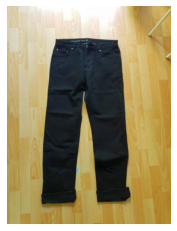

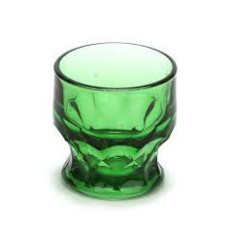

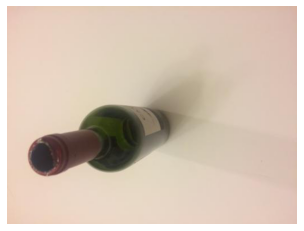

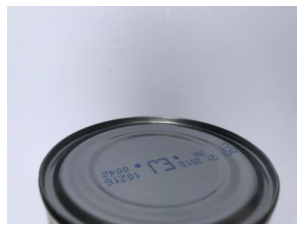

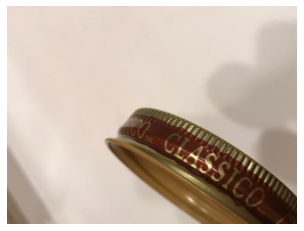

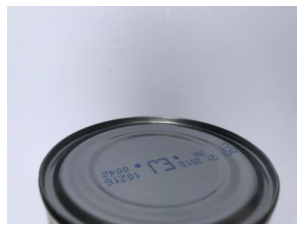

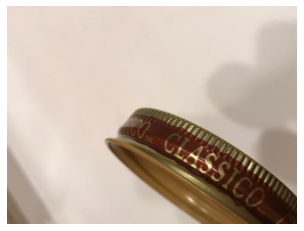

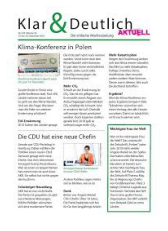

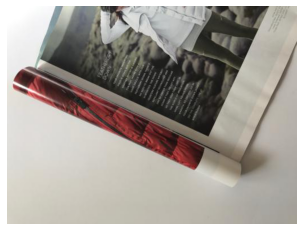

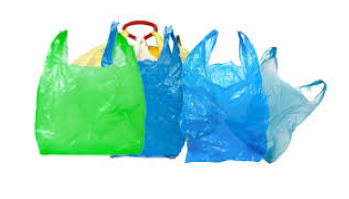

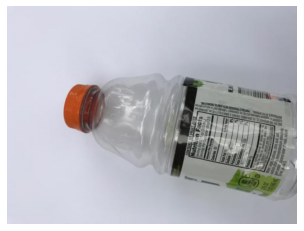

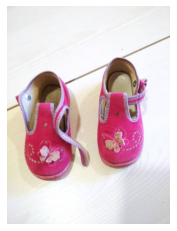

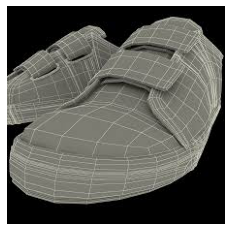

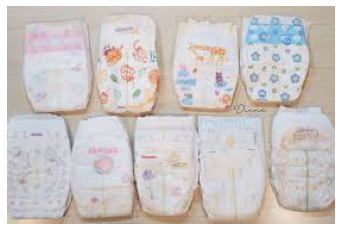

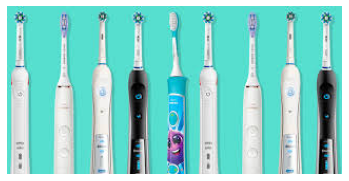

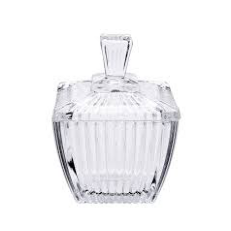

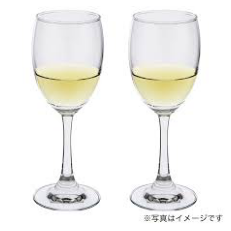

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_battery = [os.path.join(battery_dir, fname) 
                for fname in battery_files[pic_index-2:pic_index]]
next_biological = [os.path.join(biological_dir, fname) 
                for fname in biological_files[pic_index-2:pic_index]]
next_brownglass = [os.path.join(brownglass_dir, fname) 
                for fname in brownglass_files[pic_index-2:pic_index]]
next_cardboard = [os.path.join(cardboard_dir, fname) 
                for fname in cardboard_files[pic_index-2:pic_index]]
next_clothes = [os.path.join(clothes_dir, fname) 
                for fname in clothes_files[pic_index-2:pic_index]]
next_greenglass = [os.path.join(greenglass_dir, fname) 
                for fname in greenglass_files[pic_index-2:pic_index]]
next_metal = [os.path.join(metal_dir, fname) 
                for fname in metal_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_plastic = [os.path.join(plastic_dir, fname) 
                for fname in plastic_files[pic_index-2:pic_index]]
next_shoes = [os.path.join(shoes_dir, fname) 
                for fname in shoes_files[pic_index-2:pic_index]]
next_trash = [os.path.join(trash_dir, fname) 
                for fname in trash_files[pic_index-2:pic_index]]
next_whiteglass = [os.path.join(whiteglass_dir, fname) 
                for fname in whiteglass_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_battery+next_biological+next_brownglass+next_cardboard+next_clothes+next_greenglass+next_metal+next_metal+next_paper+next_plastic+next_shoes+next_trash+next_whiteglass):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### **Building the Model**

Implemented image augmentation and building the model using keras sequential. We trained the model on 20 epochs.

In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "garbage_classification"
training_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2,
	  rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "garbage_classification"
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  subset='validation'
)

Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [10]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("garbage_class.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### **Plotting the Training and Validation Accuracy**

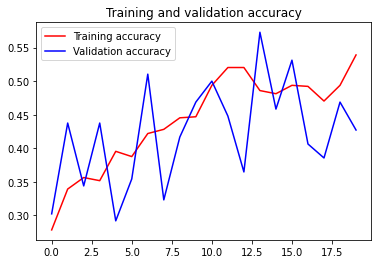

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### **Predicting Image**

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving battery.jpg to battery.jpg
battery.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### **Saving the Model into .tflite Format**

In [14]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="garbage_class.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('garbage_class.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpgmepdzwe/assets
